In [699]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [700]:
#Read in the csv file and convert to a Pandas dataframe
df15 = pd.read_csv(r"C:\Users\osama\Downloads\archive (4)\2015.csv")
df16 = pd.read_csv(r"C:\Users\osama\Downloads\archive (4)\2016.csv")
df17 = pd.read_csv(r"C:\Users\osama\Downloads\archive (4)\2017.csv")
df18 = pd.read_csv(r"C:\Users\osama\Downloads\archive (4)\2018.csv")
df19 = pd.read_csv(r"C:\Users\osama\Downloads\archive (4)\2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [701]:
print(df15.shape ,df16.shape, df17.shape,df18.shape,df19.shape)
all = [df15,df16,df17,df18,df19]

(158, 12) (157, 13) (155, 12) (156, 9) (156, 9)


In [702]:
def toString(l):
    for i in l:
        print(i.to_string)
        print('--------------------')
toString(all)
df15

<bound method DataFrame.to_string of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [703]:
for i in all:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [704]:
for i in all:
    print(i.describe())

       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.02

In [705]:
for i in all:
    print(i.columns)
    print('--------')

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
--------
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
--------
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
--------
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy li

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [706]:
# the data source was metioned on kaggle

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [707]:
# its not up to date we only have data until 2019

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [708]:
#the columns are not the same across all files 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [709]:
df15[df15.duplicated()]
df16[df16.duplicated()]
df17[df17.duplicated()]
df18[df18.duplicated()]
df19[df19.duplicated()]

# there is no duplicates records

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [710]:
# go to delete duplicates columns

for i in all:
    print(i.columns)
    print('--------')

#there is no duplicates columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
--------
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
--------
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
--------
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy li

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [711]:
#Display number missing values per column
print(df15.isnull().sum())
print(df16.isnull().sum())
print(df17.isnull().sum())
print(df18.isnull().sum())
print(df19.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Country                          0
Happiness.Rank                   0
Happiness.Score              

In [712]:
# go to clean them 
df18[df18['Perceptions of corruption'].isna()]
df18.fillna(df18['Perceptions of corruption'].mean(),inplace=True)
df18.iloc[17:25]
# df18[df18['Country or region'] == 'Saudi Arabia']

# there is a null value in the Perceptions of corruption on the record 19 , 2018 data
#  which belong to the United Arab Emirates	and i filled it with the mean of the column

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,18,United States,6.886,1.398,1.471,0.819,0.547,0.291,0.133
18,19,Israel,6.814,1.301,1.559,0.883,0.533,0.354,0.272
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,0.112
20,21,Czech Republic,6.711,1.233,1.489,0.854,0.543,0.064,0.034
21,22,Malta,6.627,1.270,1.525,0.884,0.645,0.376,0.142
22,23,France,6.489,1.293,1.466,0.908,0.520,0.098,0.176
23,24,Mexico,6.488,1.038,1.252,0.761,0.479,0.069,0.095
24,25,Chile,6.476,1.131,1.331,0.808,0.431,0.197,0.061


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [724]:
# check columns types 
for i in all:
    print(i.dtypes)
df15['Region'].unique()

Country               object
Region                object
Happiness Rank         int64
Happiness Score      float64
Standard Error       float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
Whisker.high          object
Whisker.low           object
year                   int64
dtype: object
Country               object
Region                object
Happiness Rank         int64
Happiness Score      float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
Whisker.high         float64
Whisker.low          float64
year                   int64
dtype: object
Country               object
Happiness Rank         int64
Happiness Score      float64
Whisker.high         float64
Whisker.low    

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [714]:
df16

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [715]:
# go to clean them 

def rename_columns(df):
    df.rename(columns={
    'Economy (GDP per Capita)': 'Economy',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Trust',
    'Dystopia.Residua' : 'Dystopia Residual'
}, inplace=True)

# rename the columns to make to applay one stander for every year 
rename_columns(df15)
rename_columns(df16)
df17.rename(columns={
    'Economy..GDP.per.Capita.': 'Economy',
    'Health..Life.Expectancy.': 'Health',
    'Trust..Government.Corruption.': 'Trust',
    'Dystopia.Residual' : 'Dystopia Residual',
    'Happiness.Score' : 'Happiness Score' , 
    'Happiness.Rank' : 'Happiness Rank'

}, inplace=True)

df16

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [716]:
# Standardizing Whisker columns

common_columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Health',
                   'Freedom', 'Trust', 'Generosity', 'Dystopia Residual', 'Whisker.high', 'Whisker.low']

df15['Whisker.high'] = None
df15['Whisker.low'] = None
df16['Whisker.high'] = df16['Upper Confidence Interval']
df16['Whisker.low'] = df16['Lower Confidence Interval']
df17['Whisker.high'] = df17['Whisker.high']
df17['Whisker.low'] = df17['Whisker.low']

# Drop the old confidence interval columns from 2016 data
df16.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)

df15['year'] = 2015
df16['year'] = 2016
df17['year'] = 2017

df17 = df17.merge(df16[['Country', 'Region']], on='Country', how='left')


alldata = pd.concat([df15,df16,df17])

alldata

# i have merge all the data and implement the same structure to them 





C:\Users\osama\AppData\Local\Temp\ipykernel_18900\2962143622.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  alldata = pd.concat([df15,df16,df17])


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Whisker.high,Whisker.low,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,NaN,NaN,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,NaN,NaN,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,NaN,NaN,2015
3,Norway,Western Europe,4,7.522,0.03880,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,NaN,NaN,2015
4,Canada,North America,5,7.427,0.03553,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,Sub-Saharan Africa,151,3.471,NaN,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,3.543030,3.398970,2017
151,Syria,Middle East and Northern Africa,152,3.462,NaN,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,3.663669,3.260331,2017
152,Tanzania,Sub-Saharan Africa,153,3.349,NaN,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,3.461430,3.236570,2017
153,Burundi,Sub-Saharan Africa,154,2.905,NaN,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,3.074690,2.735310,2017


In [717]:
# top 10 happeist countries

top10 = alldata[alldata['Happiness Rank'] <= 10].sort_values(by=['year', 'Happiness Rank'])
print(top10['Country'].unique())
top10

# no change in the top 10 counntreis, the same 10 countreis but with different ranks between them


['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia']


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Whisker.high,Whisker.low,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,NaN,NaN,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,NaN,NaN,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,NaN,NaN,2015
3,Norway,Western Europe,4,7.522,0.03880,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,NaN,NaN,2015
4,Canada,North America,5,7.427,0.03553,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,NaN,NaN,2015
5,Finland,Western Europe,6,7.406,0.03140,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550,NaN,NaN,2015
6,Netherlands,Western Europe,7,7.378,0.02799,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700,NaN,NaN,2015
7,Sweden,Western Europe,8,7.364,0.03157,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190,NaN,NaN,2015
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250,NaN,NaN,2015
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460,NaN,NaN,2015


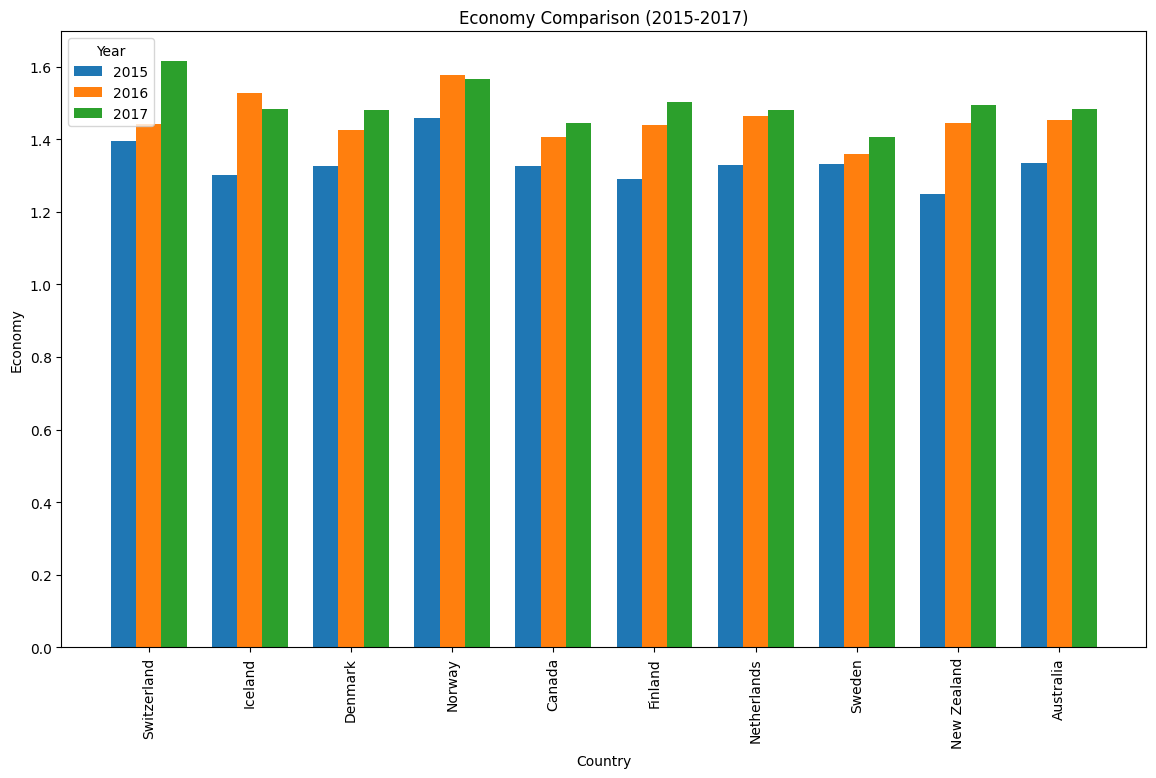

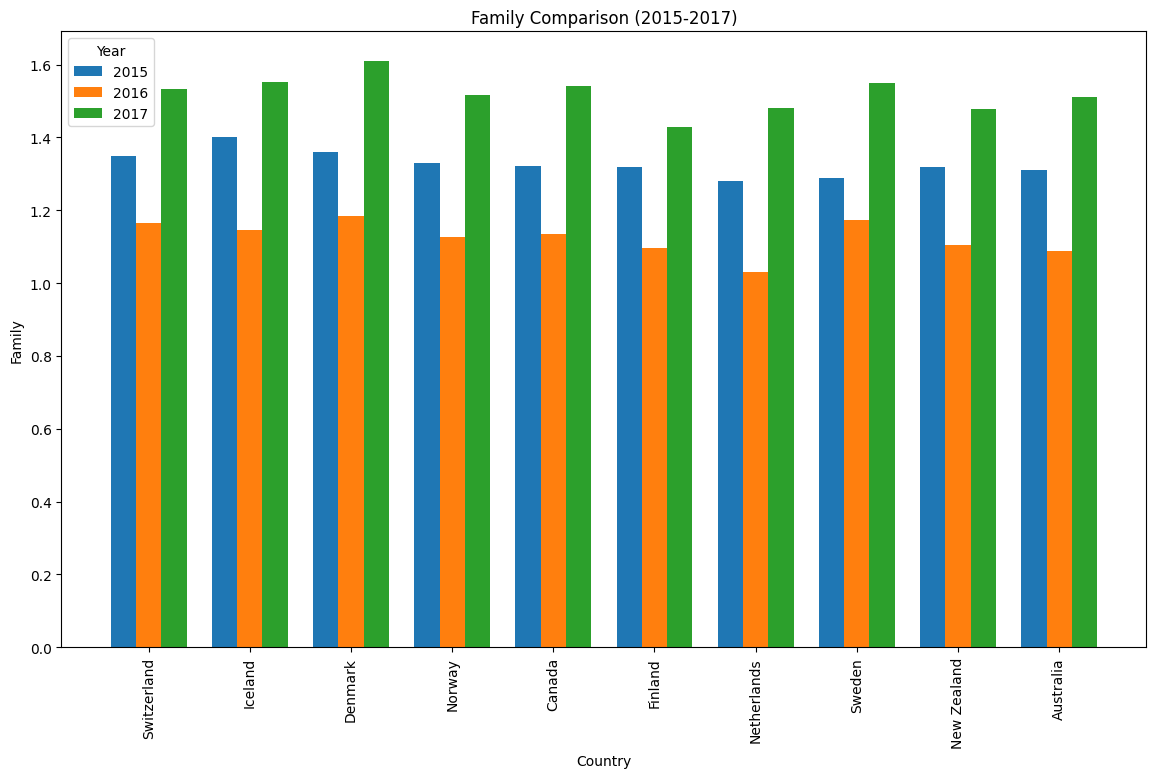

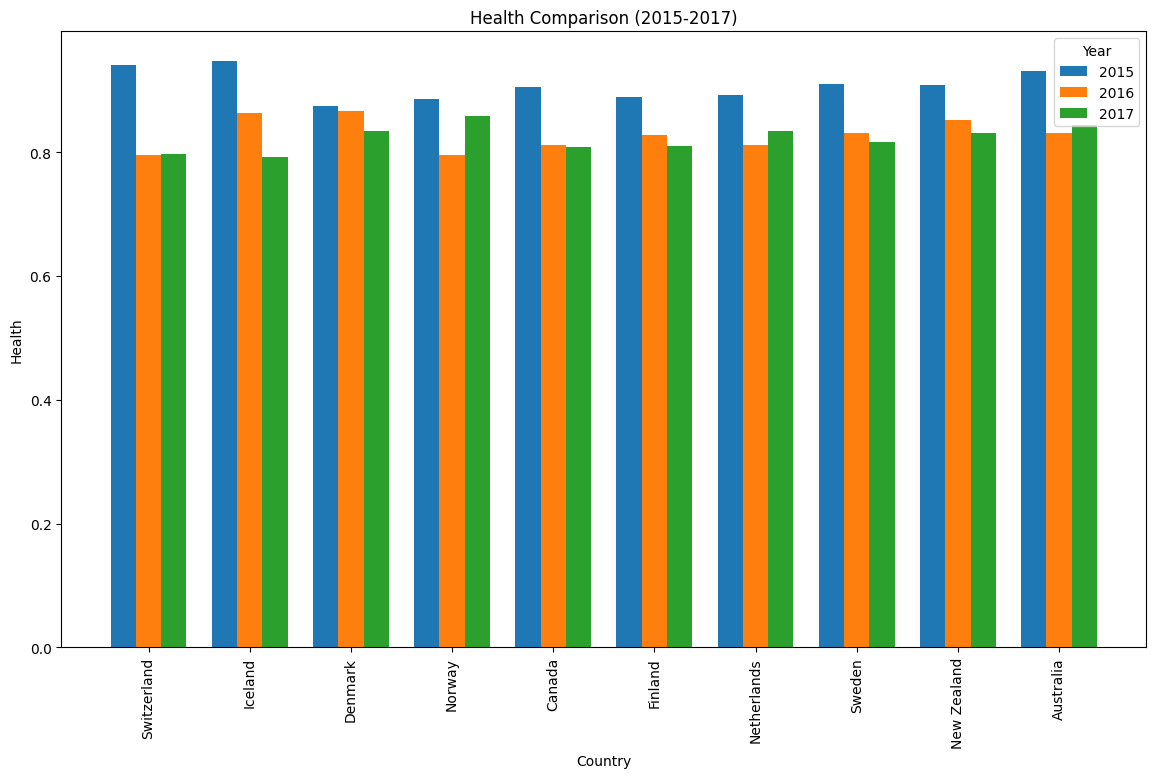

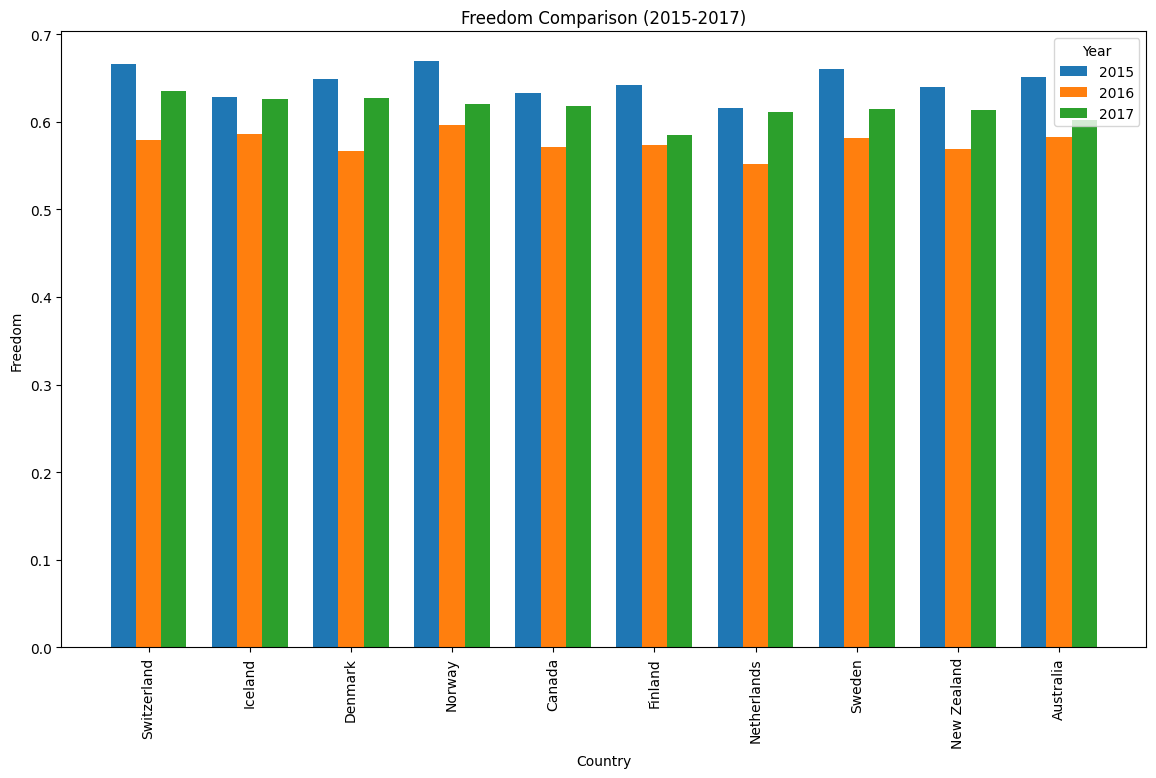

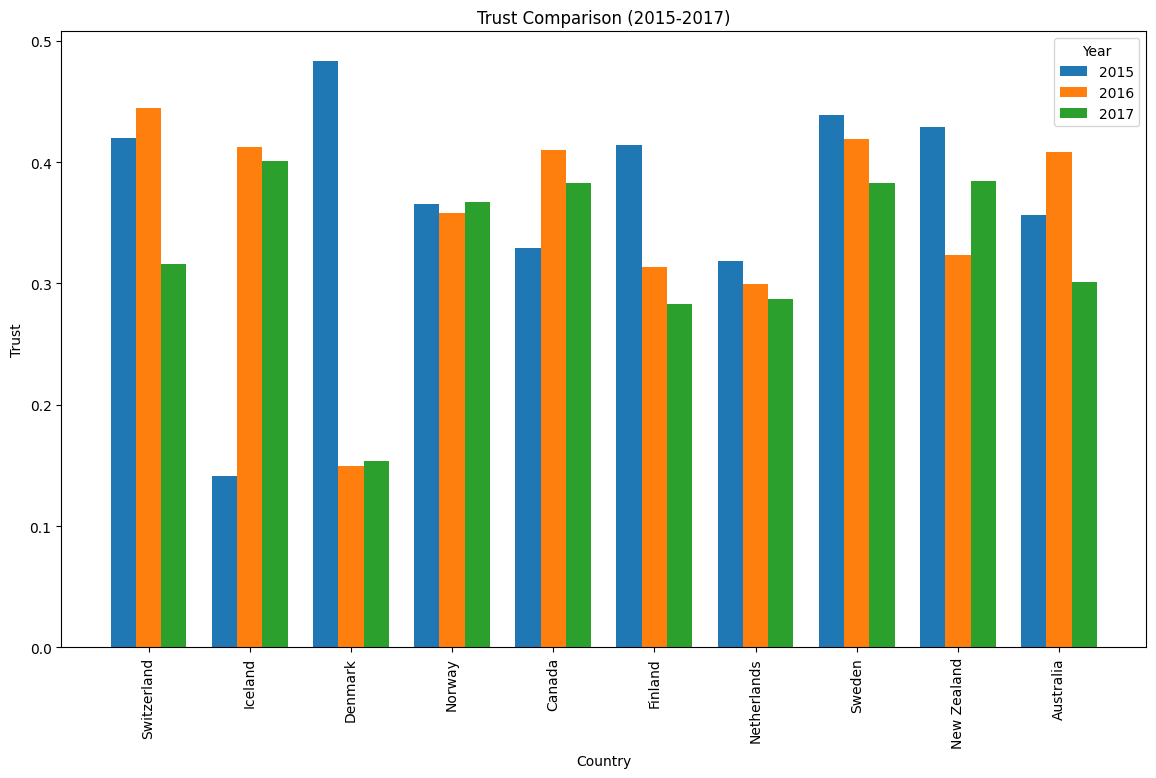

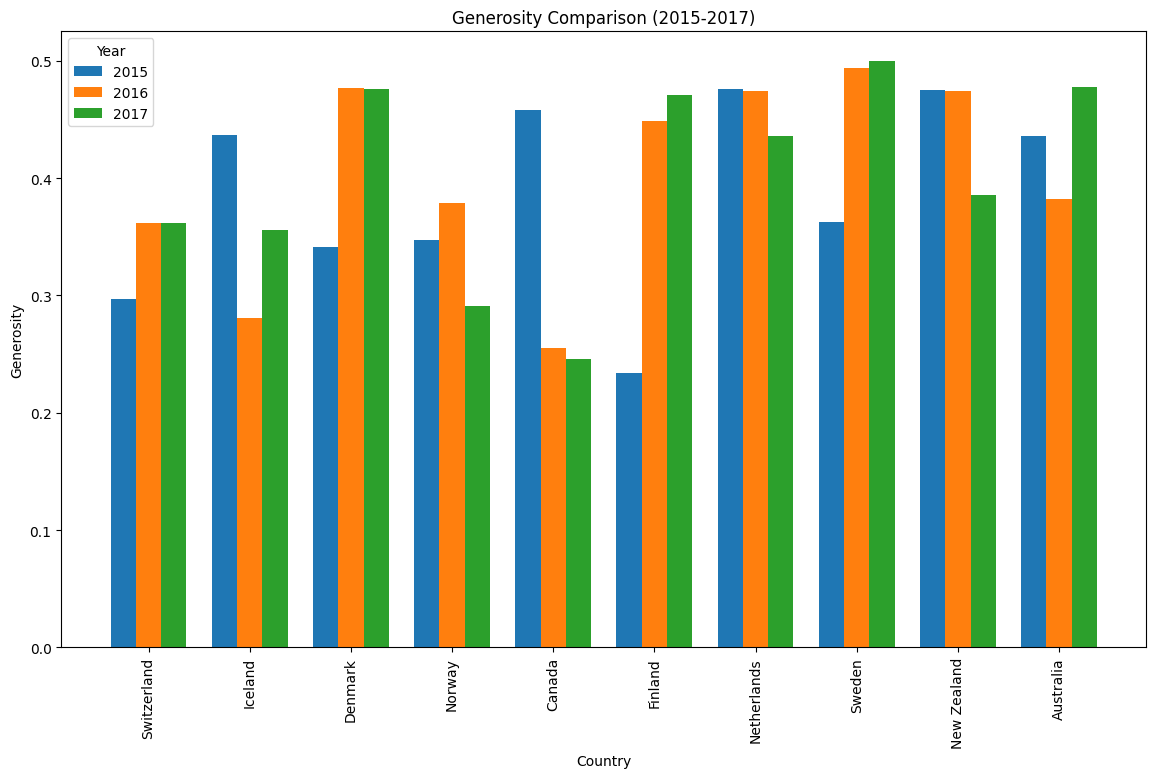

In [733]:
import matplotlib.pyplot as plt




# Plotting changes in Happiness Score for each country across the years
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

# Plot grouped bar charts for each factor
for factor in factors:
    fig, ax = plt.subplots(figsize=(14, 8))
    width = 0.25  # the width of the bars
    x = np.arange(len(top10['Country'].unique()))  # the label locations
    
    for i, year in enumerate([2015, 2016, 2017]):
        subset = top10[top10['year'] == year]
        ax.bar(x + i * width, subset[factor], width, label=str(year))

    ax.set_title(f'{factor} Comparison (2015-2017)')
    ax.set_xlabel('Country')
    ax.set_ylabel(factor)
    ax.set_xticks(x + width)
    ax.set_xticklabels(top10['Country'].unique(), rotation=90)
    ax.legend(title='Year')

    plt.show()

In [718]:
# check outliers 



**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [719]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [720]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [721]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [722]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [723]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.